<a href="https://colab.research.google.com/github/Jahnavi-Jaolekar/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Cardiovascular Risk Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1** - Kaustubh K Amare
##### **Team Member 2** - Md. Nawab Ali
##### **Team Member 3** - Jahnavi Jaolekar

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides, the patients' information. It includes over 4,000 records and 15 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.metrics import make_scorer, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from xgboost import XGBRFClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.combine import SMOTETomek
import matplotlib.pyplot as plt
import seaborn as sns
!pip install missingno
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load Dataset
crp_df = pd.read_csv('/content/drive/MyDrive/capstone project 3/Copy of data_cardiovascular_risk.csv')

### Dataset First View

In [5]:
# Dataset First Look
crp_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
rows=crp_df.shape[0]
columns=crp_df.shape[1]
print(f'Number of rows in dataset are {rows}')
print(f'Number of columns in dataset are {columns}')

Number of rows in dataset are 3390
Number of columns in dataset are 17


### Dataset Information

In [7]:
# Dataset Info
crp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
# Defining function to determine null values in dataset and datatype of the data
def brief():
  values=pd.DataFrame(index=crp_df.columns)
  values['Null Count']= crp_df.isnull().sum()
  values['Duplicate']=crp_df.duplicated()
  values['unique_count']= crp_df.nunique()
  return values 

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
brief()

,Null Count,Duplicate,unique_count
id,0,NaN,3390
age,0,NaN,39
education,87,NaN,4
sex,0,NaN,2
is_smoking,0,NaN,2
cigsPerDay,22,NaN,32
BPMeds,44,NaN,2
prevalentStroke,0,NaN,2
prevalentHyp,0,NaN,2
diabetes,0,NaN,2


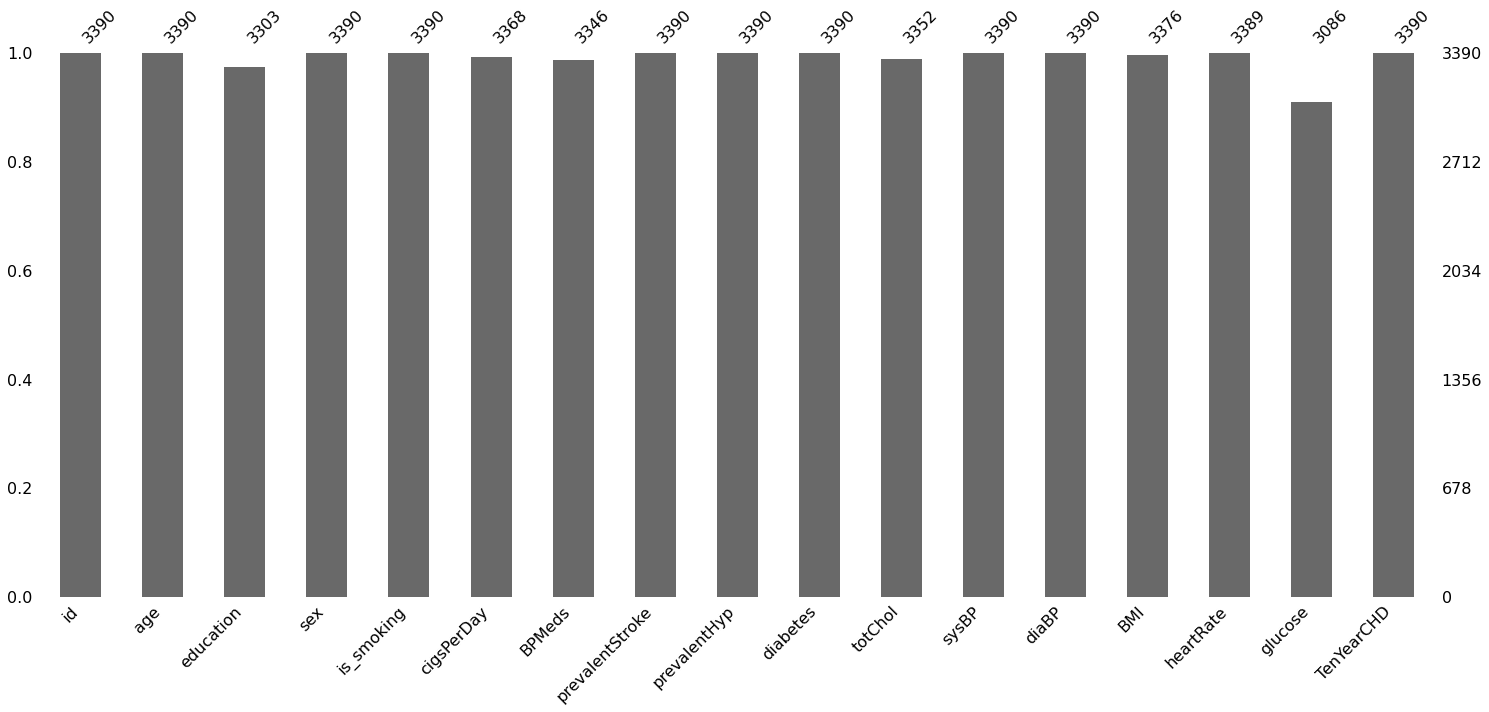

In [11]:
# Visualizing the missing values
msno.bar(crp_df)

### What did you know about your dataset?

Data set is in csv format, it has 3390 rows and 17 columns.

7 columns have null values namely:

education column has 87 null values, cigs_per_day has 22, BP_Meds has 44, totchol has 38, BMI has 14, and glucose ha 304.
since our data set is very small we cannnot remove or drop null values, we can only replace them.

Dataset does not have any duplicate values as well.



## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
crp_df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [13]:
# Dataset Describe
crp_df.describe().round(2).style.background_gradient().set_properties(**{'border': '1.3px solid red',
                          'color': 'black'})

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.000000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.540000,1.970000,9.070000,0.030000,0.010000,0.320000,0.030000,237.070000,132.600000,82.880000,25.790000,75.980000,82.090000,0.150000
std,978.750000,8.590000,1.020000,11.880000,0.170000,0.080000,0.460000,0.160000,45.250000,22.290000,12.020000,4.120000,11.970000,24.240000,0.360000
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.500000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


### Variables Description 

#### Column Details

| Field | Description || Field | Description |
|-------|-------------||-------|-------------|
|Age|Age of the patient||totChol|Cholestrol measure|
|Education|||sysBP|systolic blood pressure|
|Sex|male or female("M" or "F")||diaBP|diastolic blood pressure|
|is_Smoking|Whether smoking currently or not||BMI|Body Mass Index|
|cigsPerDay|Cigarettes smoked per day||heartRate|Heart Rate Measure|
|BPMeds|whether or not the patient was on blood pressure medication||glucose|Level of glucose in th body|
|prevalentStroke|whether or not the patient had previously had a stroke||prevalentHyp| whether or not the patient was hypertensive |
|diabetes|Patient has Diabetes or not||TenYearCHD|10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”|

### Check Unique Values for each variable.

In [20]:
# Check Unique Values for each variable.
for col in crp_df.columns:
  uniques=crp_df[col].unique()
  print(uniques)

[   0    1    2 ... 3387 3388 3389]
[64 36 46 50 61 41 55 53 43 44 58 51 56 42 38 63 35 54 62 47 34 39 59 45
 49 60 40 52 48 37 65 57 68 67 33 66 69 70 32]
[ 2.  4.  1.  3. nan]
['F' 'M']
['YES' 'NO']
[ 3.  0. 10. 20. 30. 35. 40. 15.  9. 60. 17. 25.  5. 43.  7. 50. 19. 18.
  1. 45.  2.  6. nan 11.  8.  4. 14. 16. 23. 13. 12. 70. 38.]
[ 0. nan  1.]
[0 1]
[0 1]
[0 1]
[221. 212. 250. 233. 241. 272. 238. 295. 220. 326.  nan 210. 213. 227.
 188. 240. 257. 267. 232. 199. 175. 164. 226. 248. 245. 279. 273. 252.
 198. 266. 216. 237. 193. 293. 180. 206. 215. 208. 262. 270. 292. 346.
 202. 340. 334. 351. 235. 243. 196. 275. 186. 190. 268. 234. 264. 156.
 260. 225. 183. 246. 174. 288. 254. 150. 211. 161. 274. 214. 195. 165.
 302. 265. 251. 205. 209. 258. 222. 247. 189. 173. 281. 382. 181. 200.
 244. 218. 261. 229. 291. 312. 170. 176. 290. 204. 239. 162. 314. 194.
 271. 313. 305. 285. 169. 224. 201. 185. 307. 179. 280. 219. 391. 300.
 253. 345. 278. 282. 255. 191. 439. 327. 287. 236. 332. 207. 230

## 3. ***Data Wrangling***

###  Handling Missing Values

In [21]:
# Handling Missing Values & Missing Value Imputation
# Replacing null values with median continuos data type 
crp_df['cigsPerDay'] = crp_df['cigsPerDay'].fillna(crp_df['cigsPerDay'].median())
crp_df['totChol'] = crp_df['totChol'].fillna(crp_df['totChol'].median())
crp_df['BMI'] = crp_df['BMI'].fillna(crp_df['BMI'].median())
crp_df['heartRate'] = crp_df['heartRate'].fillna(crp_df['heartRate'].median())
crp_df['glucose'] = crp_df['glucose'].fillna(crp_df['glucose'].median())
# Replacing null values with mode for 
crp_df['education'] = crp_df['education'].fillna(crp_df['education'].mode()[0])
crp_df['BPMeds'] = crp_df['BPMeds'].fillna(crp_df['BPMeds'].mode()[0])

#### What all missing value imputation techniques have you used and why did you use those techniques?

As for the numerical columns we used median to replace null values present we could have used mean value but as we know that mean is affected by outliers whereas median is not affected by outliers. For the categorical data we used mode(returns a repeated value which has been repeated highest) to replace null values 

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code
# target/dependent variable distribution
sns.set_style('whitegrid')
sns.countplot(x='TenYearCHD', data=crp_df, palette='YlGnBu_r')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code
# Histplots for BMI and Heartrate
for col in columns:
  fig= plt.subplots(figsize=(13,4))
  sns.histplot(data=crp_df, x=col)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code
x = crp_df.groupby('age')['TenYearCHD'].agg(np.sum)

plt.figure(figsize=(18,6))
plt.plot(x ,  color='blue', marker='*')
plt.xticks(rotation=90)
plt.xlabel('age---->')
plt.ylabel('TenYearCHD---->')
plt.title('TenYearCHD vs age')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code
# Relationship between gender and CHD risk
fig = plt.figure(figsize=(8,5))
sns.countplot(data=crp_df,x='sex',palette=["#6aac90","#5833ff"], hue='TenYearCHD')
plt.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
plt.xlabel("sex")
plt.ylabel("Ten year CHD")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code
# Relationship between sge and cholestrol
p=sns.jointplot(x="age", y="totChol", data=crp_df, color="g")
plt.subplots_adjust(top=.9)
p.fig.suptitle('Age v/s total cholestrol in mg/dl') 
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code
# Plot to check how many people smoke
sns.catplot(data=crp_df, kind='count', x='sex',hue='is_smoking', palette='Blues')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code
# Display age distribution
fig, ax = plt.subplots(figsize=(15,6))
age_dis=pd.DataFrame(cv_df.groupby(['age'])['id'].count())
sns.barplot(x=age_dis.index,y=age_dis['id'])
plt.ylabel('Counts')
plt.title('Age Distrubution')


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code 


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code 
corr=crp_df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(corr, mask=mask, vmax=.5, center=0, annot=True, linewidths=1.0, cbar_kws={"shrink": .5})

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code
# Multivariate analysis
# color=sns.set_palette('pastel')
# sns.pairplot(crp_df[columns], palette= color)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats
#perform one sample t-test
stats.ttest_1samp(a=crp_df['age'], popmean=49.5)

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 2. Handling Outliers

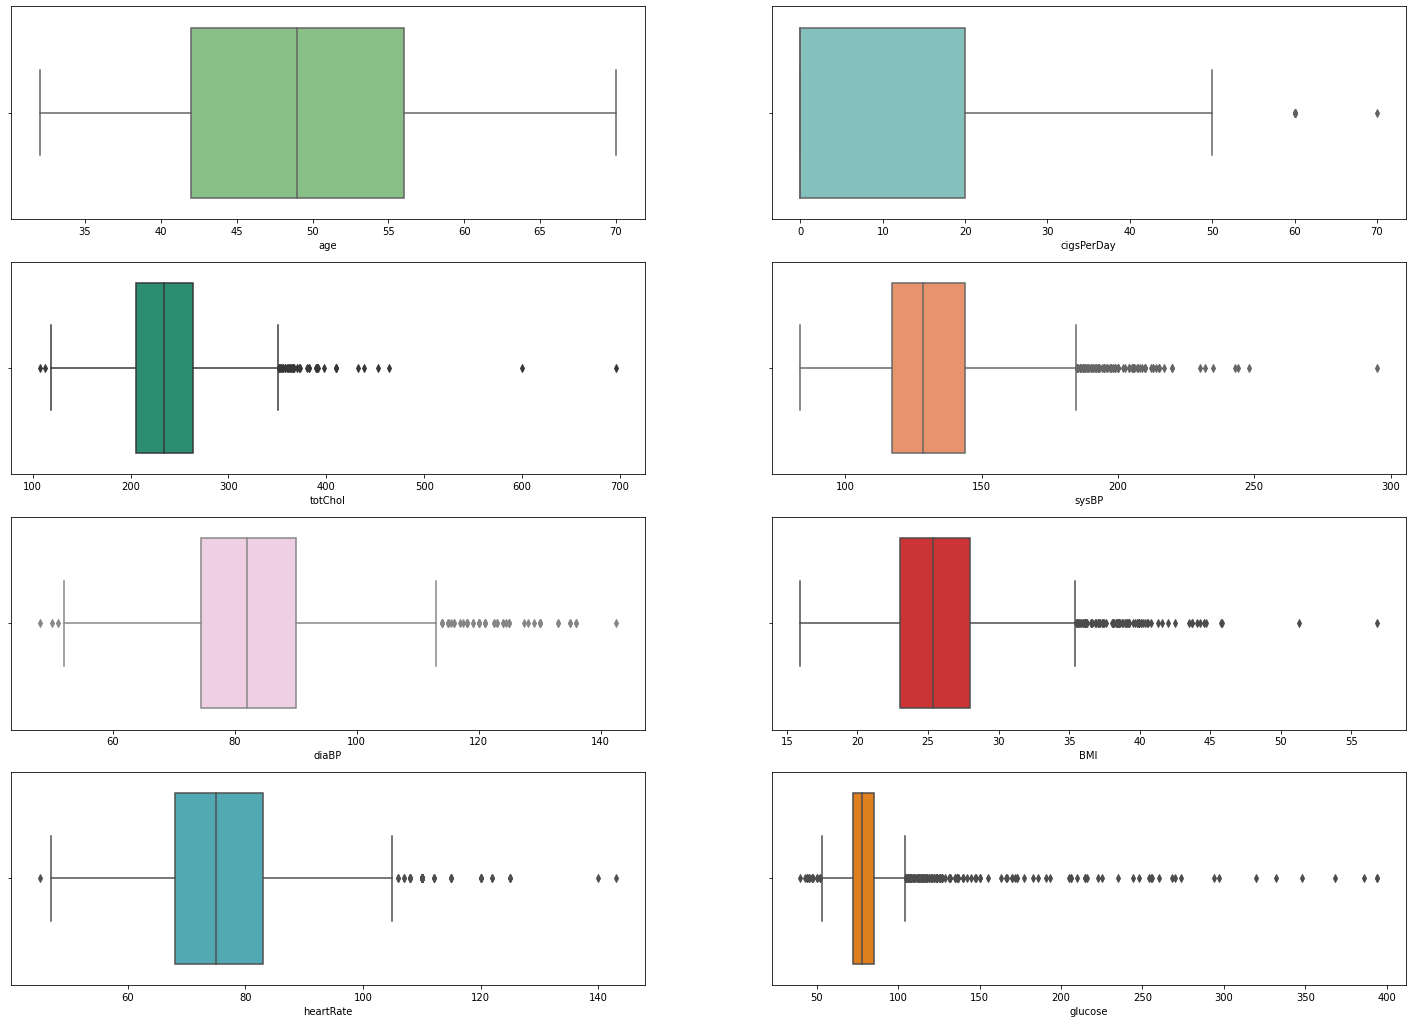

In [22]:
# Handling Outliers & Outlier treatments
# Box plot for visualizing outliers
figure, ax = plt.subplots(nrows=4, ncols=2, figsize=(25,18))
sns.boxplot(crp_df['age'], palette='Accent', ax=ax[0,0])
sns.boxplot(crp_df['cigsPerDay'],palette='GnBu', ax=ax[0,1])
sns.boxplot(crp_df['totChol'],palette='Dark2', ax=ax[1,0])
sns.boxplot(crp_df['sysBP'], palette='OrRd',ax=ax[1,1])
sns.boxplot(crp_df['diaBP'], palette='Pastel2_r', ax=ax[2,0])
sns.boxplot(crp_df['BMI'],palette='Set1', ax=ax[2,1])
sns.boxplot(crp_df['heartRate'], palette='YlGnBu_r', ax=ax[3,0])
sns.boxplot(crp_df['glucose'],palette='autumn', ax=ax[3,1])

##### What all outlier treatment techniques have you used and why did you use those techniques?

As we can see frm the above boxplots that we have a lot of outliers in few of the columns but we cannot reove or replace as high values of BMI, BP, etc show that patient has high risk of cardivascular disease, if we remove these values we might get false results during model predictions. 

### 3. Categorical Encoding

In [23]:
# Encode your categorical columns
crp_df=pd.get_dummies(crp_df, columns=['sex'])
crp_df.columns

Index(['id', 'age', 'education', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'sex_F', 'sex_M'],
      dtype='object')

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [24]:
# Manipulate Features to minimize feature correlation and create new features
# Adding pulse pressure as a column
crp_df['MAP'] =  (crp_df["sysBP"] + 2 * crp_df["diaBP"])/3

#### 2. Feature Selection

In [25]:
# Select your features wisely to avoid overfitting
features=['age', 'education','sex_F', 'sex_M', 'BPMeds', 'cigsPerDay' ,'totChol','heartRate' ,'prevalentStroke','glucose',  'prevalentHyp',  'diabetes', 'MAP']
final_df= crp_df[features]

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Scaling

In [26]:
# Scaling your data
scaler = MinMaxScaler()
scoring = make_scorer(f1_score, pos_label=1)
columns = [i for i in crp_df.describe().columns if i not in ['TenYearCHD']]

##### Which method have you used to scale you data and why?

### 6. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 7. Data Splitting

In [27]:
# Split your data to train and test. Choose Splitting ratio wisely.
x=final_df[features]
y=crp_df['TenYearCHD']
x_train, x_test, y_train, y_test = train_test_split( x, y , test_size = 0.2, random_state = 21)

##### What data splitting ratio have you used and why? 

Answer Here.

### 8. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [28]:
# Handling Imbalanced Dataset (If needed)
x_smote, y_smote = SMOTETomek(random_state=42).fit_resample(x_train, y_train)
# Checking Value counts for both classes Before and After handling Class Imbalance:
for col,label in [[y_train,"Before"],[y_smote,'After']]:
  print(label+' Handling Class Imbalace:')
  print(col.value_counts(),'\n')

Before Handling Class Imbalace:
0    2304
1     408
Name: TenYearCHD, dtype: int64 

After Handling Class Imbalace:
0    2270
1    2270
Name: TenYearCHD, dtype: int64 



##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

 It is obvious that the classes are unbalanced, which would cause the model to be more biassed in favour of the "0" class (people with no Risk of CHD). We must discover a method for training a model such that it may accept some risk and provide more results in the "1" class.

We need to create a model that can forecast the risk of CHD, which is the rationale behind that. The model need to be able to foretell the risk of heart disease if there is even a remote possibility, given the patient's health statistics.

However, in a real-world scenario, our model is more beneficial because it is extremely likely that such a model will be able to anticipate whether a patient is at danger. Certainly, this would cause our model to reach a lower accuracy score since it is taking more risks for "at risk" patients.

A typical technique would have improved our accuracy in this case due to the class imbalance, but in the real world, such a model isn't an acceptable answer because it's predicted that it will frequently fail to determine whether the patient is at risk, defeating the goal of the project.

Therefore, we are using SMOTETomek on the training set to address these imbalances. The Synthetic Minority Oversampling Technique, or SMOTE for short, is a type of data augmentation for the minority class. The strategy works because it generates convincing new synthetic examples from the minority class that are substantially near in feature space to already existing examples from the minority class..

## ***7. ML Model Implementation***

### ML Model - 1

In [29]:
# ML Model - 1 Implementation
logreg = LogisticRegression(fit_intercept=True, max_iter=10000)
# Fit the Algorithm
logreg.fit(x_smote,y_smote)
# Predict on the model
train__prob_preds = logreg.predict_proba(x_smote)
test__prob_preds = logreg.predict_proba(x_test)
train_preds = logreg.predict(x_smote)
test_preds = logreg.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [31]:
# Visualizing evaluation Metric Score chart
Evaluation = classification_report(y_test, test_preds, output_dict = True)

# Adding results to the evaluation dataframe.
EM_df = pd.DataFrame(Evaluation).transpose()
EM_df['Model'] = 'Logistic Regression'
Scores=pd.DataFrame()
Scores = Scores.append(EM_df[2:-2])


In [35]:
Scores

,precision,recall,f1-score,support,Model
accuracy,0.756637,0.756637,0.756637,0.756637,Logistic Regression


### ML Model - 2

In [36]:
# ML Model - 1 Implementation
knn = KNeighborsClassifier(n_neighbors = 2)
# Fit the Algorithm
knn.fit(x_smote, y_smote)
# Predict on the model
knn_y_pred = knn.predict(x_test)
knn_y_pred_proba = knn.predict_proba(x_test)[:,1]

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

#### 2. Cross- Validation & Hyperparameter Tuning

In [37]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
knn = KNeighborsClassifier() 

# GridSearch to find the best parameters
param_grid = {'n_neighbors':np.arange(1,50)}
knn_cv= GridSearchCV(knn, param_grid, cv=5)
# Fit the Algorithm
knn_cv.fit(x_smote, y_smote)
# Predict on the model
knn_cv_y_pred = knn_cv.predict(x_test)

In [38]:
# Visualizing evaluation Metric Score chart
Evaluation = classification_report(y_test, knn_cv_y_pred, output_dict = True)

# Adding results to the evaluation dataframe.
EM_df = pd.DataFrame(Evaluation).transpose()
EM_df['Model'] = 'KNN'

Scores = Scores.append(EM_df[2:-2])
Scores

,precision,recall,f1-score,support,Model
accuracy,0.756637,0.756637,0.756637,0.756637,Logistic Regression
accuracy,0.734513,0.734513,0.734513,0.734513,KNN


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [39]:
# ML Model - 3 Implementation
nb = GaussianNB()
# Fit the Algorithm
nb.fit(x_smote, y_smote)
# Predict on the model
nb_y_pred = nb.predict(x_test)
nb_y_train_pred = nb.predict(x_smote)
nb_y_pred_proba = nb.predict_proba(x_test)[:,1]

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [40]:
# Visualizing evaluation Metric Score chart
Evaluation = classification_report(y_test, nb_y_pred, output_dict = True)

# Adding results to the evaluation dataframe.
EM_df = pd.DataFrame(Evaluation).transpose()
EM_df['Model'] = 'Naive Bayes'

Scores = Scores.append(EM_df[2:-2])
Scores

,precision,recall,f1-score,support,Model
accuracy,0.756637,0.756637,0.756637,0.756637,Logistic Regression
accuracy,0.734513,0.734513,0.734513,0.734513,KNN
accuracy,0.786136,0.786136,0.786136,0.786136,Naive Bayes


### ML Model - 4

In [41]:
# ML Model - 1 Implementation
xgb = XGBRFClassifier()
# Fit the Algorithm
xgb.fit(x_smote, y_smote)
# Predict on the model
xgb_y_pred = xgb.predict(x_test)
xgb_y_pred_proba = xgb.predict_proba(x_test)[:,1]

In [44]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
xgb = XGBRFClassifier()

# GridSearch to find the best parameters
grid = {'n_estimators' : [150],
        'max_depth' : [8,10],
        'min_samples_split' : [50,100],
        'min_samples_leaf' : [30,50],
        'eta' : [0.05,0.08,0.1]}
xgb_cv= GridSearchCV(xgb, param_grid = grid, scoring = scoring, cv=5)

# Fit the Algorithm
xgb_cv.fit(x_smote, y_smote)
# Predict on the model
xgb_cv_y_pred = xgb_cv.predict(x_test)

In [45]:
# Visualizing evaluation Metric Score chart
Evaluation = classification_report(y_test, xgb_cv_y_pred, output_dict = True)

# Adding results to the evaluation dataframe.
EM_df = pd.DataFrame(Evaluation).transpose()
EM_df['Model'] = 'XG Boost'

Scores = Scores.append(EM_df[2:-2])
Scores

,precision,recall,f1-score,support,Model
accuracy,0.756637,0.756637,0.756637,0.756637,Logistic Regression
accuracy,0.734513,0.734513,0.734513,0.734513,KNN
accuracy,0.786136,0.786136,0.786136,0.786136,Naive Bayes
accuracy,0.800885,0.800885,0.800885,0.800885,XG Boost


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***